In [136]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
import matplotlib as mpl
import numpy as np

def set_mpl_params():
    plt.rcParams['font.size'] = '14'
    plt.rcParams['lines.linewidth'] = 1.5
    plt.rcParams['axes.linewidth'] = 1.5

<IPython.core.display.Javascript object>


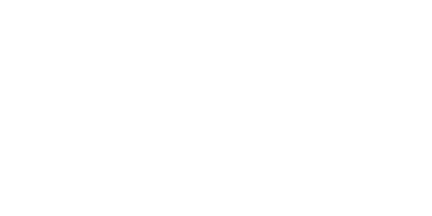

interactive(children=(FloatSlider(value=9.90001, description='beta', max=20.0, min=1e-05), FloatSlider(value=5…

In [137]:
%matplotlib notebook

set_mpl_params()

def U(phi_range, Phi_rel, beta):
    return Phi_0 * I_c / (2*np.pi) * ( 1/(2*beta) * (phi_range - 2*np.pi*Phi_rel) **2 - np.cos(phi_range))

Phi_0 = 2.06783383e-15
I_c = 1e-6

w = 10 # plot range

phi_range = np.linspace(-w*np.pi, w*np.pi, 1000)

init_beta = 20
init_Phi_rel = 0

fig, ax = plt.subplots(figsize=(6,3))

line, = plt.plot(phi_range/np.pi,  U(phi_range, init_Phi_rel, init_beta))

ax.set_xlabel('phi/pi')
plt.tight_layout()

    
def update_plot(beta, Phi_rel):
    line.set_ydata(U(phi_range, Phi_rel, beta))

    fig.canvas.draw_idle()

    return

interact(update_plot, beta=(1e-5,20,0.1), Phi_rel=(0,10,0.1));

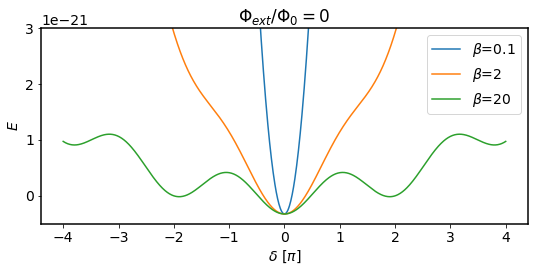

In [144]:
%matplotlib inline
set_mpl_params()

fig, ax = plt.subplots(figsize=(8,4))

betas = [1e-1, 2, 20]
Phi_rel = 0
w = 4
phi_range = np.linspace(-w*np.pi, w*np.pi, 1000)


for beta in betas:
    plt.plot(phi_range/np.pi,  U(phi_range, Phi_rel=Phi_rel, beta=beta), label=r"$\beta$="+str(beta))
    
plt.xlabel('$\delta~ [\pi]$')
plt.ylabel('$E$')
plt.ylim([-0.5e-21, 3e-21])
plt.title('$\Phi_{ext} / \Phi_{0}=$'+str(Phi_rel))
plt.legend(loc="upper right")
plt.tight_layout()

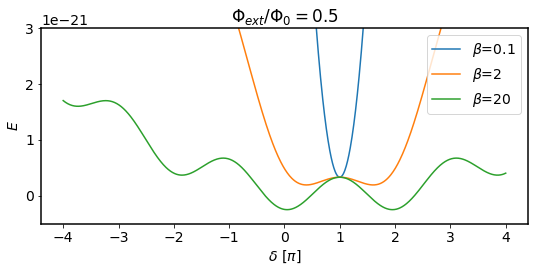

In [145]:
%matplotlib inline
set_mpl_params()


fig, ax = plt.subplots(figsize=(8,4))

betas = [1e-1, 2, 20]
Phi_rel = 0.5
w = 4
phi_range = np.linspace(-w*np.pi, w*np.pi, 1000)


for beta in betas:
    plt.plot(phi_range/np.pi,  U(phi_range, Phi_rel=Phi_rel, beta=beta), label=r"$\beta$="+str(beta))
    
plt.xlabel('$\delta~ [\pi]$')
plt.ylabel('$E$')
plt.ylim([-0.5e-21, 3e-21])
plt.title('$\Phi_{ext} / \Phi_{0}=$'+str(Phi_rel))
plt.legend(loc="upper right")
plt.tight_layout()

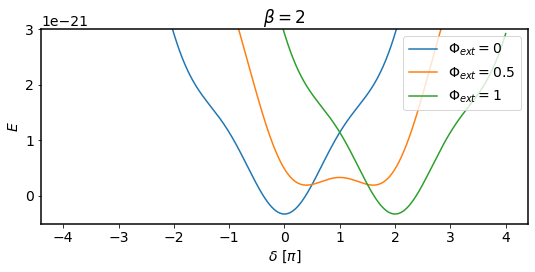

In [143]:
%matplotlib inline
set_mpl_params()

fig, ax = plt.subplots(figsize=(8,4))

Phi_rels = [0, .5, 1]
beta = 2

w = 4
phi_range = np.linspace(-w*np.pi, w*np.pi, 1000)


for Phi_rel in Phi_rels:
    plt.plot(phi_range/np.pi,  U(phi_range, Phi_rel=Phi_rel, beta=beta), label=r"$\Phi_{ext}=$"+str(Phi_rel))
    
plt.xlabel('$\delta~ [\pi]$')
plt.ylabel('$E$')
plt.ylim([-0.5e-21, 3e-21])
plt.title(r'$\beta=$'+str(beta))

plt.legend(loc="upper right")
plt.tight_layout()

In [141]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.animation as animation

set_mpl_params()


def U(phi_range, Phi_rel, beta):
    return Phi_0 * I_c / (2*np.pi) * ( 1/(2*beta) * (phi_range - 2*np.pi*Phi_rel) **2 - np.cos(phi_range))

w = 4 # plot range

phi_range = np.linspace(-w*np.pi, w*np.pi, 1000)


N_frame = 400
Phi_rel_max = 2
Phi_rels = np.concatenate([np.linspace(0,Phi_rel_max,N_frame//2), np.linspace(Phi_rel_max,0,N_frame//2)])

beta = 10
init_Phi_rel = Phi_rels[0]

fig, ax = plt.subplots(figsize=(8,4))

line, = plt.plot(phi_range/np.pi,  U(phi_range, init_Phi_rel, init_beta))

plt.xlabel('$\delta~ [\pi]$')
plt.ylabel('$E$')
plt.ylim([-0.5e-21, 3e-21])
plt.title(r'$\beta=$'+str(beta))
plt.tight_layout()
    
def animate(frame_num):
    Phi_rel = Phi_rels[frame_num]
    line.set_ydata(U(phi_range, Phi_rel, beta))
    return line

anim = FuncAnimation(fig, animate, frames=N_frame, interval=20)


video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)


plt.close()       

In [142]:
import matplotlib.animation as animation


FFwriter = animation.FFMpegWriter(fps=50)
anim.save('animation.mp4', writer = FFwriter)
